In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("train.csv")


In [3]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
test_df=pd.read_csv("test.csv")

In [5]:
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [6]:
test_df.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_11039,361,2,0,0,2016-08-26,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [7]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
train_df["category"]=train_df["category"].map(category)
test_df["category"]=test_df["category"].map(category)

In [8]:
train_df=train_df[train_df.views!='F']
train_df=train_df[train_df.likes!='F']
train_df=train_df[train_df.dislikes!='F']
train_df=train_df[train_df.comment!='F']

In [9]:
test_df=test_df[test_df.views!='F']
test_df=test_df[test_df.likes!='F']
test_df=test_df[test_df.dislikes!='F']
test_df=test_df[test_df.comment!='F']


In [10]:
train_df["views"]=pd.to_numeric(train_df["views"])
train_df["comment"]=pd.to_numeric(train_df["comment"])
train_df["likes"]=pd.to_numeric(train_df["likes"])
train_df["dislikes"]=pd.to_numeric(train_df["dislikes"])
train_df["adview"]=pd.to_numeric(train_df["adview"])

In [11]:
test_df["views"]=pd.to_numeric(test_df["views"])
test_df["comment"]=pd.to_numeric(test_df["comment"])
test_df["likes"]=pd.to_numeric(test_df["likes"])
test_df["dislikes"]=pd.to_numeric(test_df["dislikes"])


In [12]:
train_df.shape

(14637, 9)

In [13]:
test_df.shape

(8549, 8)

In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [15]:
train_df['duration']=LabelEncoder().fit_transform(train_df['duration'])
train_df['vidid']=LabelEncoder().fit_transform(train_df['vidid'])
train_df['published']=LabelEncoder().fit_transform(train_df['published'])

In [16]:
test_df['duration']=LabelEncoder().fit_transform(test_df['duration'])
test_df['vidid']=LabelEncoder().fit_transform(test_df['vidid'])
test_df['published']=LabelEncoder().fit_transform(test_df['published'])

In [17]:
import datetime
import time

In [18]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00 '
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time=mp.apply(checki)

In [19]:
def fun_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600 + int(m)*60+int(s)

time1=time.apply(fun_sec)

train_df["duration"]=time1
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [20]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00 '
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp
test=pd.read_csv("test.csv")
mp=pd.read_csv("test.csv")["duration"]
time=mp.apply(checki)

In [21]:
def fun_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600 + int(m)*60+int(s)

time1=time.apply(fun_sec)
test_df["duration"]=time1
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


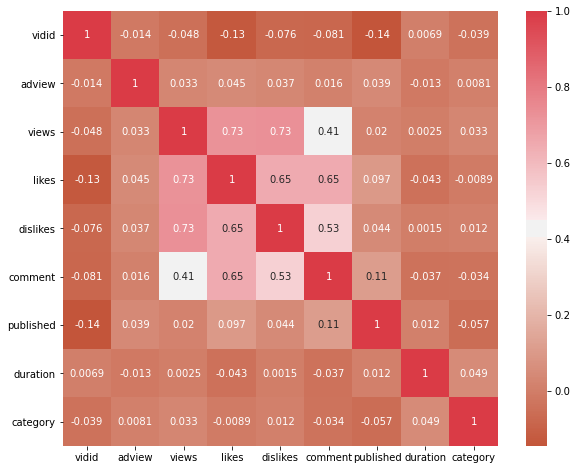

In [22]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr = train_df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(20,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

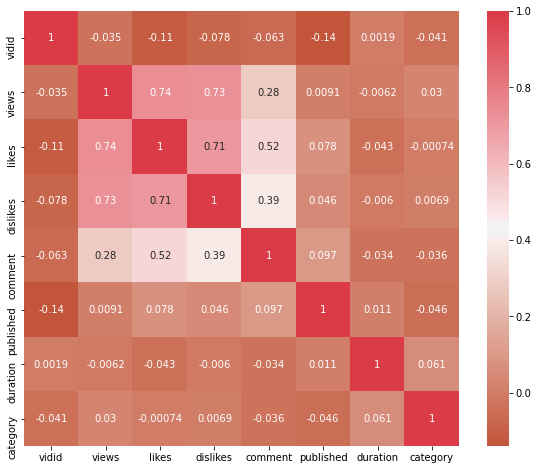

In [23]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr = test_df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(20,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [24]:
main_df=train_df.copy()

In [25]:
main_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [26]:
final_df=pd.concat([train_df,test_df],axis=0)

In [27]:
final_df.shape

(23186, 9)

In [28]:
final_df.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [29]:

df_Train=final_df.iloc[:14637,:]
df_Test=final_df.iloc[14637:,:]

In [30]:
df_Test.shape

(8549, 9)

In [31]:
df_Test.drop(['adview'],axis=1,inplace=True)


c:\users\admin\pycharmprojects\machinelearning\venv\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df_Test.shape

(8549, 8)

In [33]:
X_train=df_Train.drop(['adview'],axis=1)
y_train=df_Train['adview']

In [34]:
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=model.predict(df_Test)

In [36]:
from joblib import dump,load
dump(model,'youtubeAdview.joblib')

['youtubeAdview.joblib']

In [37]:
y_pred

array([1958.85,    7.91,    2.62, ...,   47.53,  216.23,  614.34])

In [38]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('predictions.csv')
datasets=pd.concat([pred],axis=1)
datasets.columns=['adview']
datasets.to_csv('predictions.csv',index=False)